In [202]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [203]:
pga=pd.read_csv('PGAdata.csv',sep=',')
pga.dropna(subset = ["Money"], inplace=True)
pga.dropna(subset = ["AvgDistance"], inplace=True)
#pga.Money=pga.Money.fillna(pga.Money.mean())
#pga.AvgDistance=pga.AvgDistance.fillna(pga.AvgDistance.mean())
pga.isnull().any() #this brings up report showing if any nulls, TRUE means there are
##Run this to export to CSV to see data in Excel> 



Player Name           False
Rounds                False
Fairway Percentage    False
Year                  False
AvgDistance           False
gir                   False
Average Putts         False
Average Scrambling    False
Average Score         False
Points                False
Wins                   True
Top 10                 True
Average SG Putts      False
Average SG Total      False
SG:OTT                False
SG:APR                False
SG:ARG                False
Money                 False
dtype: bool

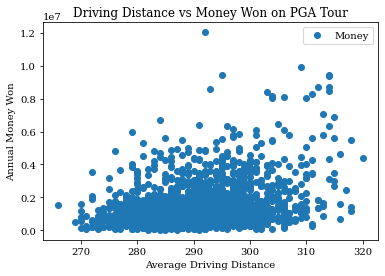

In [204]:
pga.plot(x='AvgDistance',y='Money',style='o')
plt.title('Driving Distance vs Money Won on PGA Tour')
plt.xlabel('Average Driving Distance')
plt.ylabel('Annual Money Won')
plt.show()

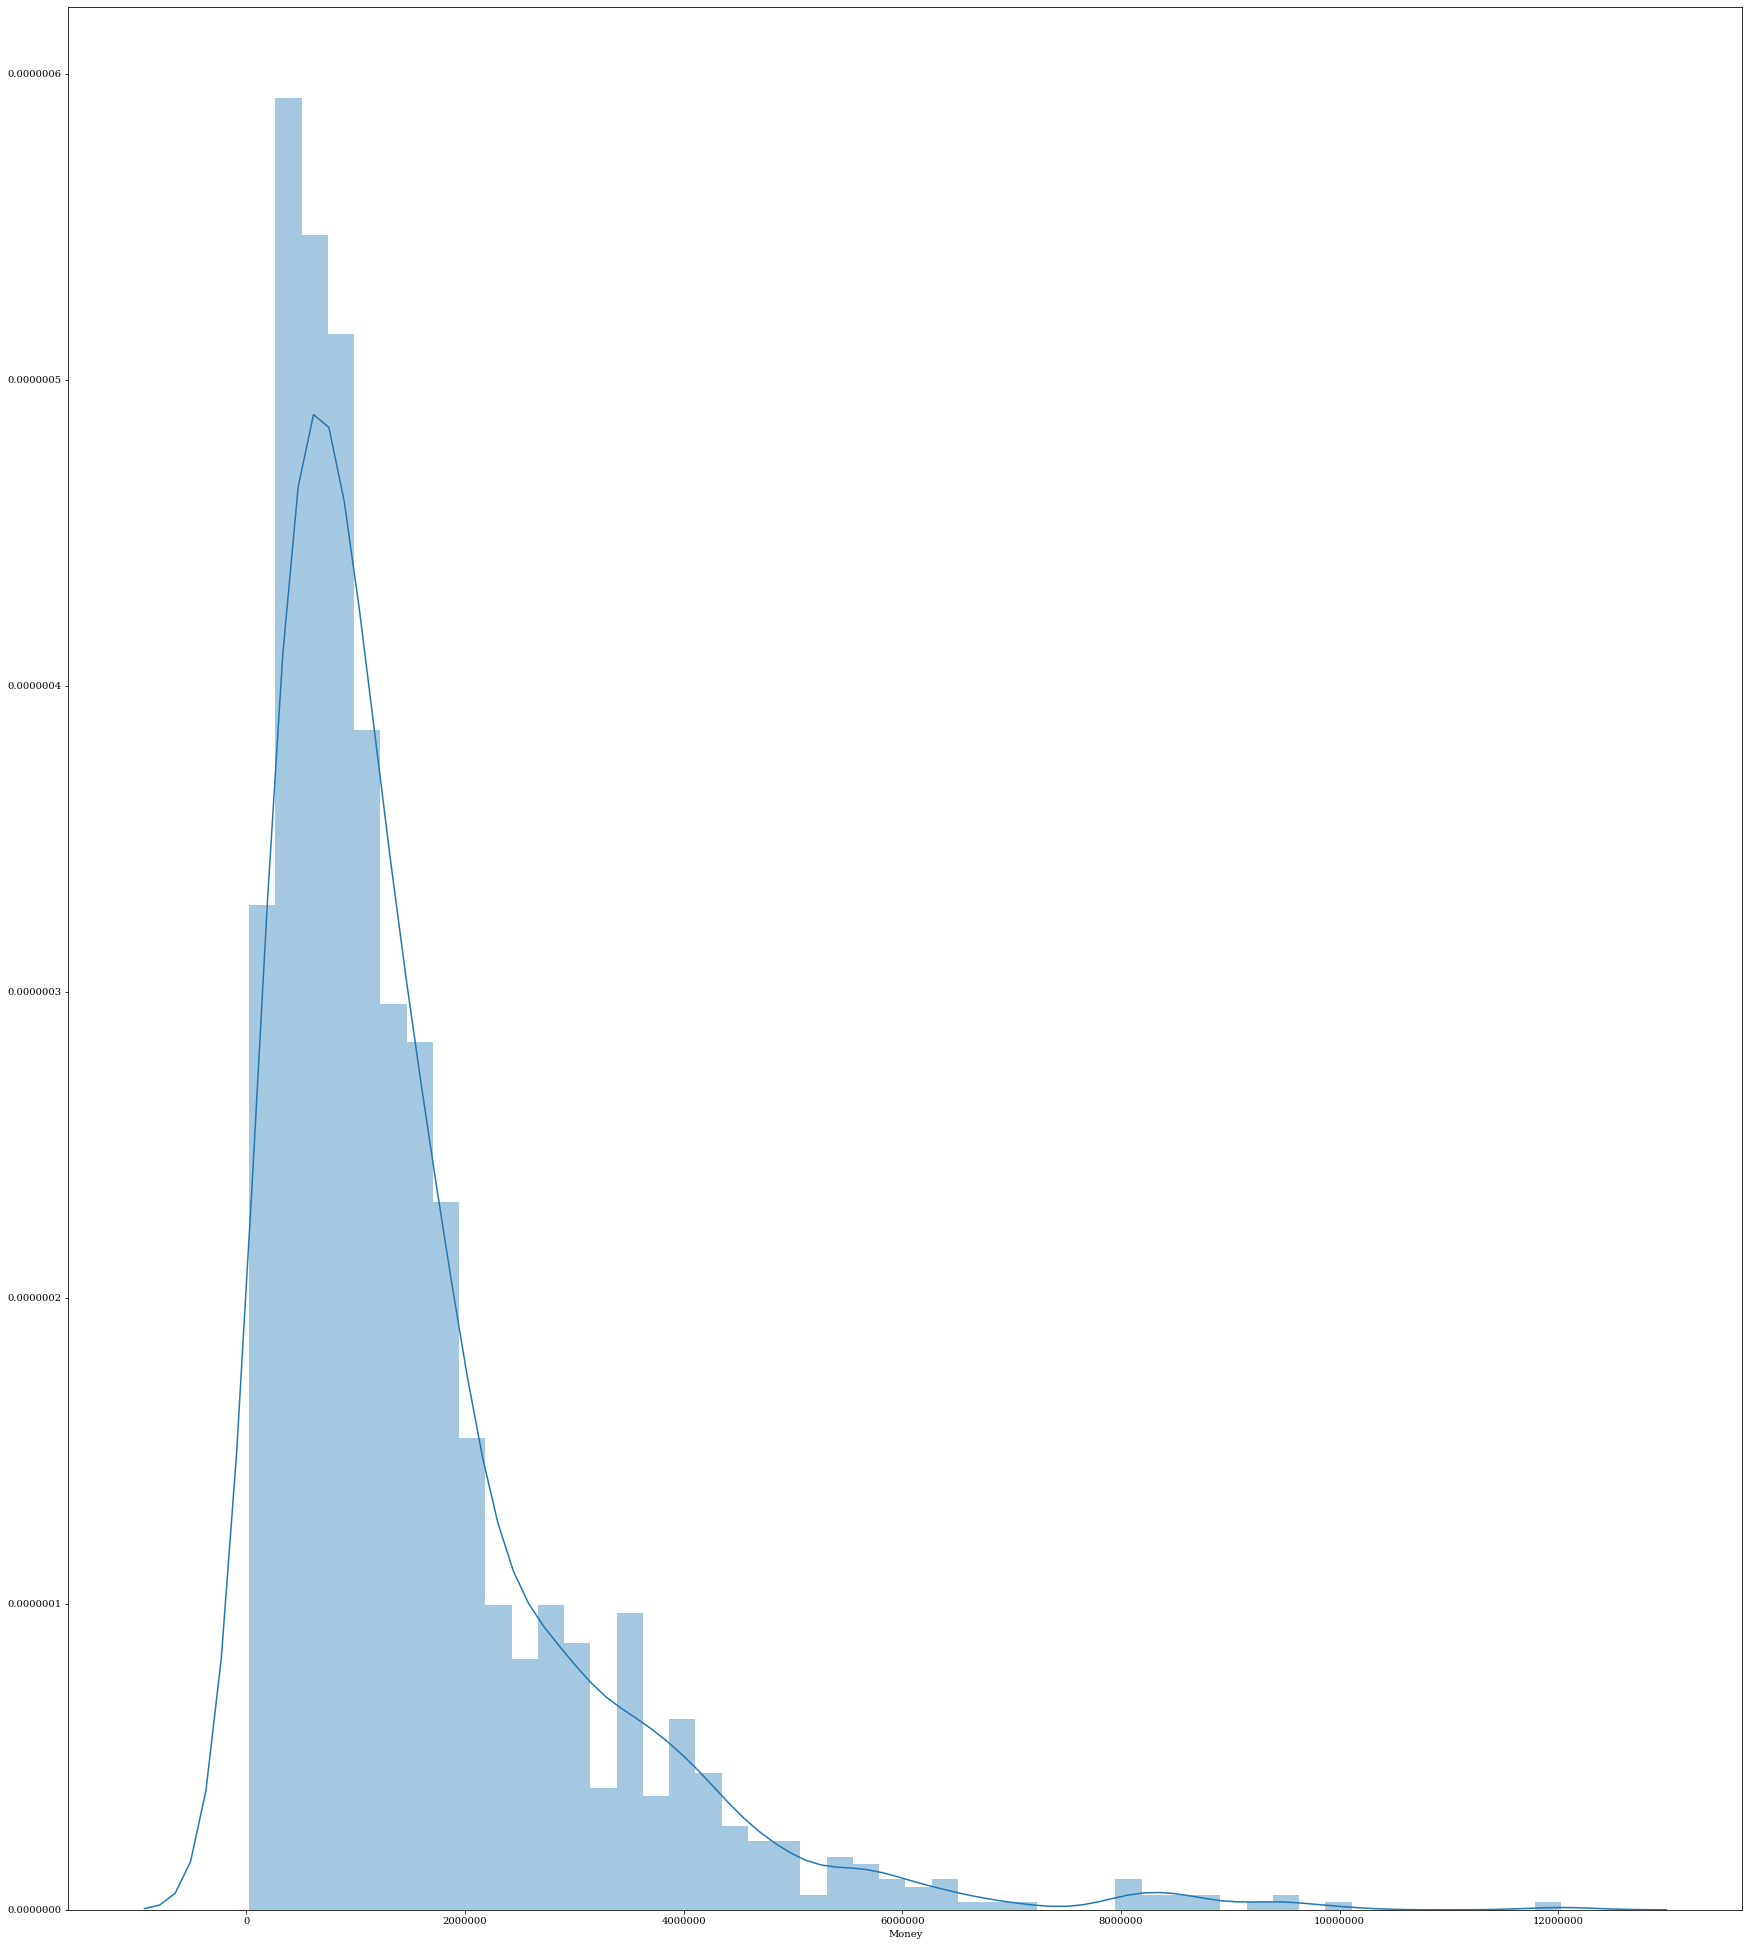

In [205]:
plt.figure(figsize=(30,35))
plt.tight_layout()
plt.ticklabel_format(useOffset=True, style='plain')
plt.rc('font', family='serif', size=40)
sb.distplot(pga['Money'])

In [206]:
X = pga['AvgDistance'].values.reshape(-1,1)
y = pga['Money'].values.reshape(-1,1)


In [207]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [208]:
regressor=LinearRegression()
regressor.fit(X_train,y_train) #training the algorithm

LinearRegression()

In [209]:
print(regressor.intercept_)
print(regressor.coef_)
##printing our Y intercept and Slope!

[-12280785.3488852]
[[47274.81749689]]


In [210]:
y_pred=regressor.predict(X_test)

In [214]:
df=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
df=df.round(1)
df

,Actual,Predicted
0,3512024.0,956163.6
1,738143.0,1428911.7
2,110451.0,1097988.0
3,1146852.0,1003438.4
4,1228947.0,1192537.6
...,...,...
330,497296.0,1097988.0
331,3088284.0,1334362.1
332,1957635.0,1428911.7
333,755998.0,1050713.2


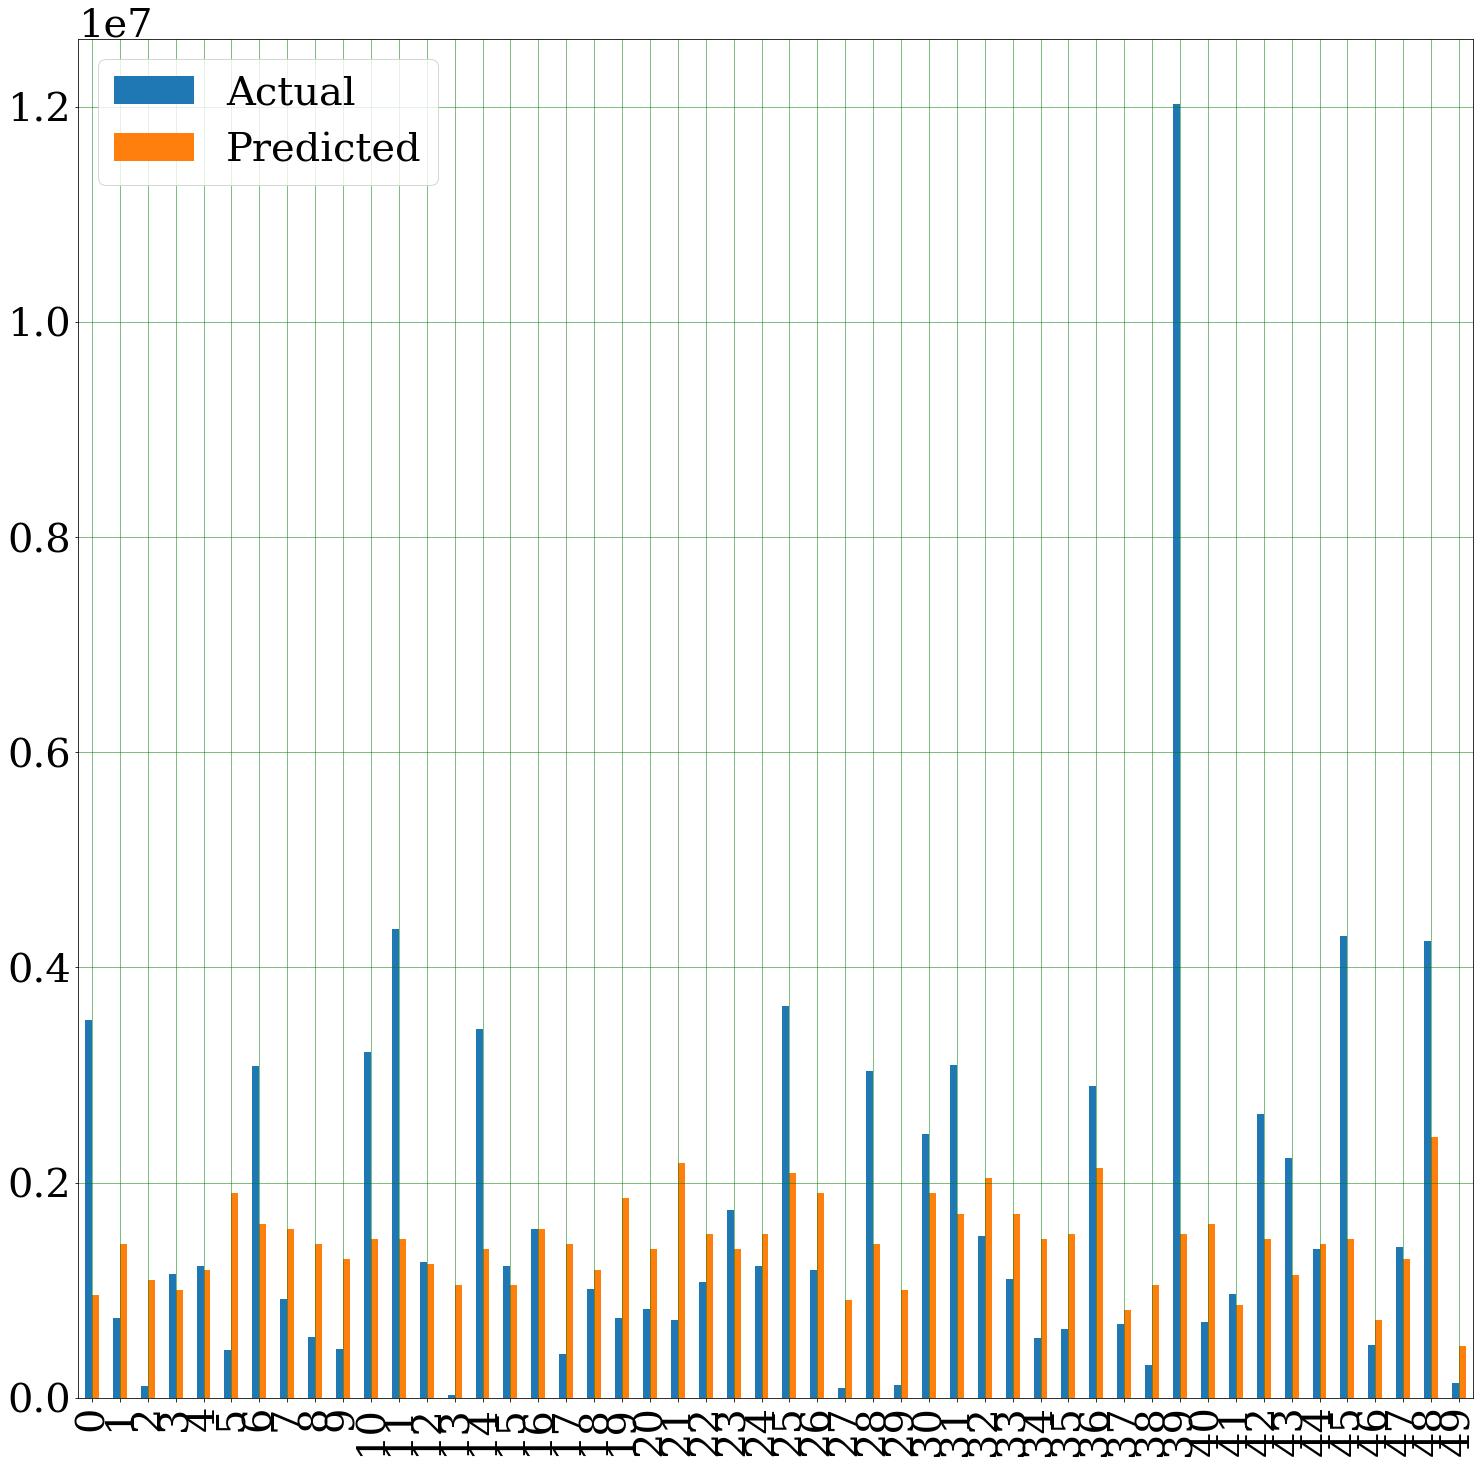

In [220]:
df1=df.head(50)
df1.plot(kind='bar',figsize=(25,25))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

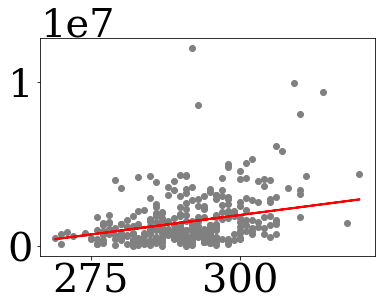

In [222]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()

In [224]:
print("Mean Abs Error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared Error:",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean squared Error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Abs Error: 963600.9472686156
Mean squared Error: 2093231468937.609
Root Mean squared Error: 1446800.4247088155
